In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Gold_Price_1950-2020_USD_INR.csv')
df.head()

,Date,Price USD per Oz,Price INR per Gm
0,1950-01,34.73,91.696167
1,1950-02,34.73,91.696167
2,1950-03,34.73,91.696167
3,1950-04,34.73,91.696167
4,1950-05,34.73,91.696167


In [3]:
df['Date']=pd.to_datetime(df['Date'])

In [4]:
df.drop(['Price USD per Oz'],axis=1,inplace=True)

In [5]:
df.set_index('Date',inplace=True)

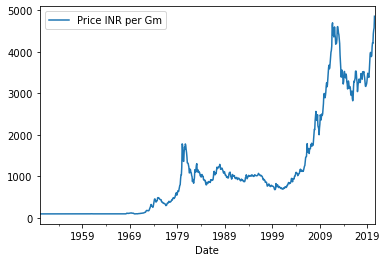

In [6]:
df.plot()

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
test_result=adfuller(df['Price INR per Gm'])
test_result

(0.8143240078549091,
 0.9918639010476807,
 11,
 835,
 {'1%': -3.4382057088878644,
  '5%': -2.865007578546518,
  '10%': -2.5686164240381513},
 9204.713318865834)

In [9]:
def adfuller_test(price):
    result=adfuller(price)
    labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for i,j in zip(result,labels):
        print(j+':'+str(i))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [10]:
adfuller_test(df['Price INR per Gm'])

ADF Test Statistic:0.8143240078549091
p-value:0.9918639010476807
#Lags Used:11
Number of Observations Used:835
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [11]:
df['Price_first_difference']=df['Price INR per Gm']-df['Price INR per Gm'].shift(1)

In [12]:
df['Price INR per Gm'].shift(1)

Date
1950-01-01            NaN
1950-02-01      91.696167
1950-03-01      91.696167
1950-04-01      91.696167
1950-05-01      91.696167
                 ...     
2020-03-01    4221.292344
2020-04-01    4207.948479
2020-05-01    4435.712993
2020-06-01    4529.883083
2020-07-01    4578.292217
Name: Price INR per Gm, Length: 847, dtype: float64

In [13]:
df['Seasonal_first_differnce']=df['Price INR per Gm']-df['Price INR per Gm'].shift(12)
df.head()

,Price INR per Gm,Price_first_difference,Seasonal_first_differnce
Date,,,
1950-01-01,91.696167,NaN,NaN
1950-02-01,91.696167,0.0,NaN
1950-03-01,91.696167,0.0,NaN
1950-04-01,91.696167,0.0,NaN
1950-05-01,91.696167,0.0,NaN


In [14]:
adfuller_test(df['Price_first_difference'].dropna())

ADF Test Statistic:-6.217086925157038
p-value:5.333282548693317e-08
#Lags Used:10
Number of Observations Used:835
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [15]:
adfuller_test(df['Seasonal_first_differnce'].dropna())

ADF Test Statistic:-4.67268633488426
p-value:9.467760551479084e-05
#Lags Used:17
Number of Observations Used:817
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


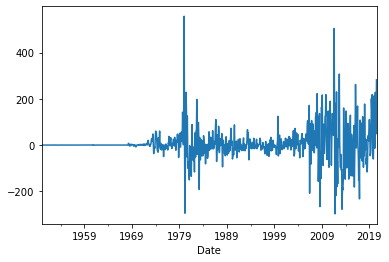

In [16]:
df['Price_first_difference'].plot()

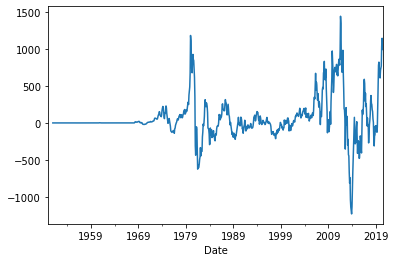

In [17]:
df['Seasonal_first_differnce'].plot()

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

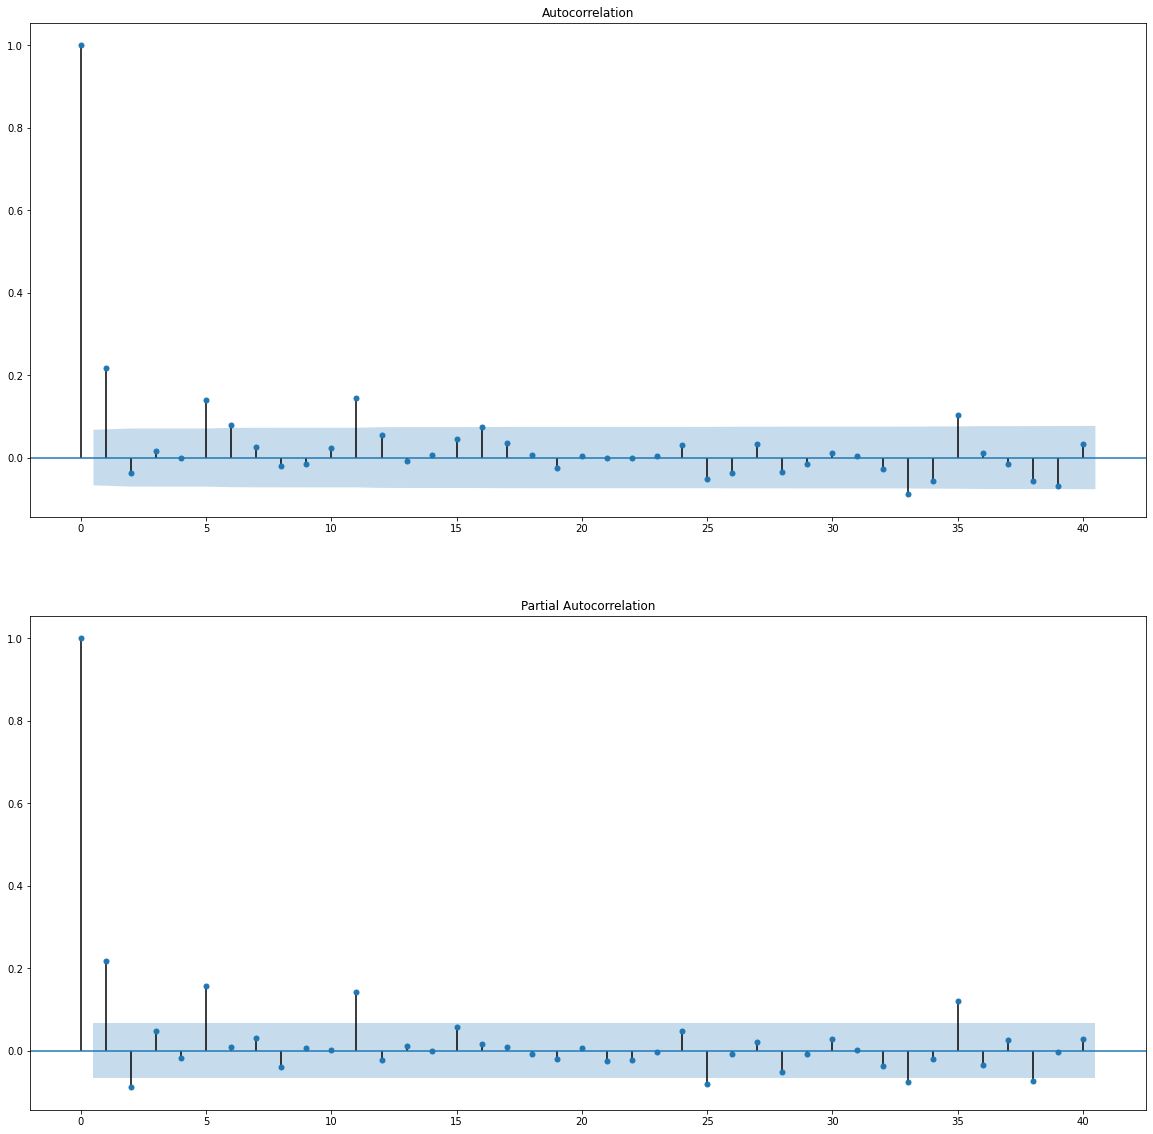

In [19]:
fig=plt.figure(figsize=(20,20))
ax1=fig.add_subplot(211)
fig= sm.graphics.tsa.plot_acf(df['Price_first_difference'].iloc[1:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig= sm.graphics.tsa.plot_pacf(df['Price_first_difference'].iloc[1:],lags=40,ax=ax2)

In [20]:
from statsmodels.tsa.arima_model import ARIMA

In [21]:
model=ARIMA(df['Price INR per Gm'],order=(1,1,1))
model_fit=model.fit()

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [22]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D.Price INR per Gm   No. Observations:                  846
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4713.410
Method:                       css-mle   S.D. of innovations             63.585
Date:                Wed, 18 Nov 2020   AIC                           9434.821
Time:                        10:35:43   BIC                           9453.783
Sample:                    02-01-1950   HQIC                          9442.086
                         - 07-01-2020                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        5.6679      2.499      2.268      0.023       0.770      10.566
ar.L1.D.Price INR per Gm    -0.5511      0.102     -5.390      0.000      -0.751      -0.351
ma.L1.D.Price INR per Gm     0.7734      0.080      9.612      0.000       0.616       0.931
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8146           +0.0000j            1.8146            0.5000
MA.1           -1.2929           +0.0000j            1.2929            0.5000
-----------------------------------------------------------------------------
"""

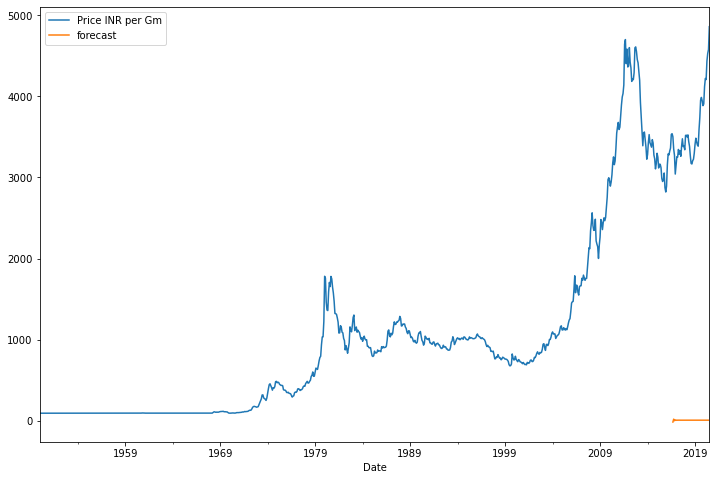

In [53]:
df['forecast']=model_fit.predict(start=800,end=900,dynamic=True)
df[['Price INR per Gm','forecast']].plot(figsize=(12,8))

In [24]:
import statsmodels.api as sm

In [25]:
model=sm.tsa.statespace.SARIMAX(df['Price INR per Gm'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


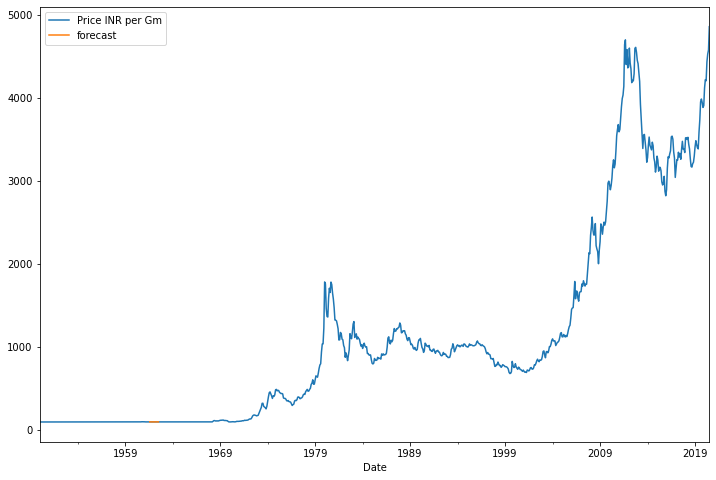

In [26]:
df['forecast']=results.predict(start=139,end=150,dynamic=True)
df[['Price INR per Gm','forecast']].plot(figsize=(12,8))

In [46]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,48)]

In [47]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [48]:
future_datest_df.tail()

,Price INR per Gm,Price_first_difference,Seasonal_first_differnce,forecast
2024-02-01,NaN,NaN,NaN,NaN
2024-03-01,NaN,NaN,NaN,NaN
2024-04-01,NaN,NaN,NaN,NaN
2024-05-01,NaN,NaN,NaN,NaN
2024-06-01,NaN,NaN,NaN,NaN


In [49]:
future_df=pd.concat([df,future_datest_df])

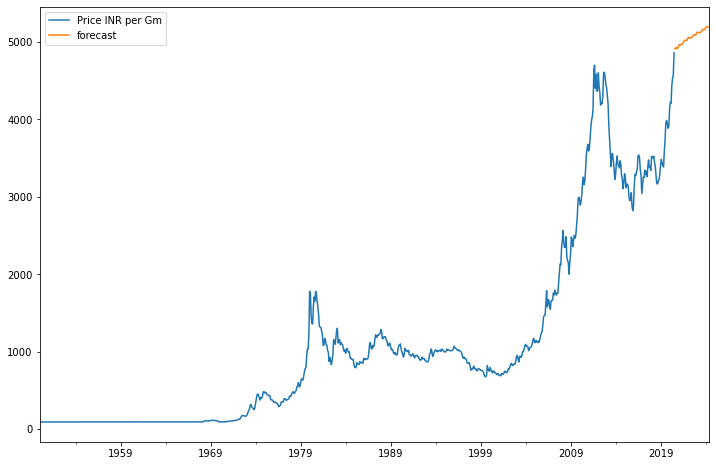

In [50]:
future_df['forecast'] = results.predict(start = 847, end = 1000, dynamic= True)  
future_df[['Price INR per Gm', 'forecast']].plot(figsize=(12, 8)) 

In [52]:
future_df.tail(50)

,Price INR per Gm,Price_first_difference,Seasonal_first_differnce,forecast
2020-05-01,4529.883083,94.170090,1143.857545,NaN
2020-06-01,4578.292217,48.409134,991.533128,NaN
2020-07-01,4860.205787,281.913570,1125.267487,NaN
2020-08-01,NaN,NaN,NaN,4919.041695
2020-09-01,NaN,NaN,NaN,4915.088364
2020-10-01,NaN,NaN,NaN,4927.574013
2020-11-01,NaN,NaN,NaN,4915.410896
2020-12-01,NaN,NaN,NaN,4919.867511
2021-01-01,NaN,NaN,NaN,4948.296960
2021-02-01,NaN,NaN,NaN,4967.208185
